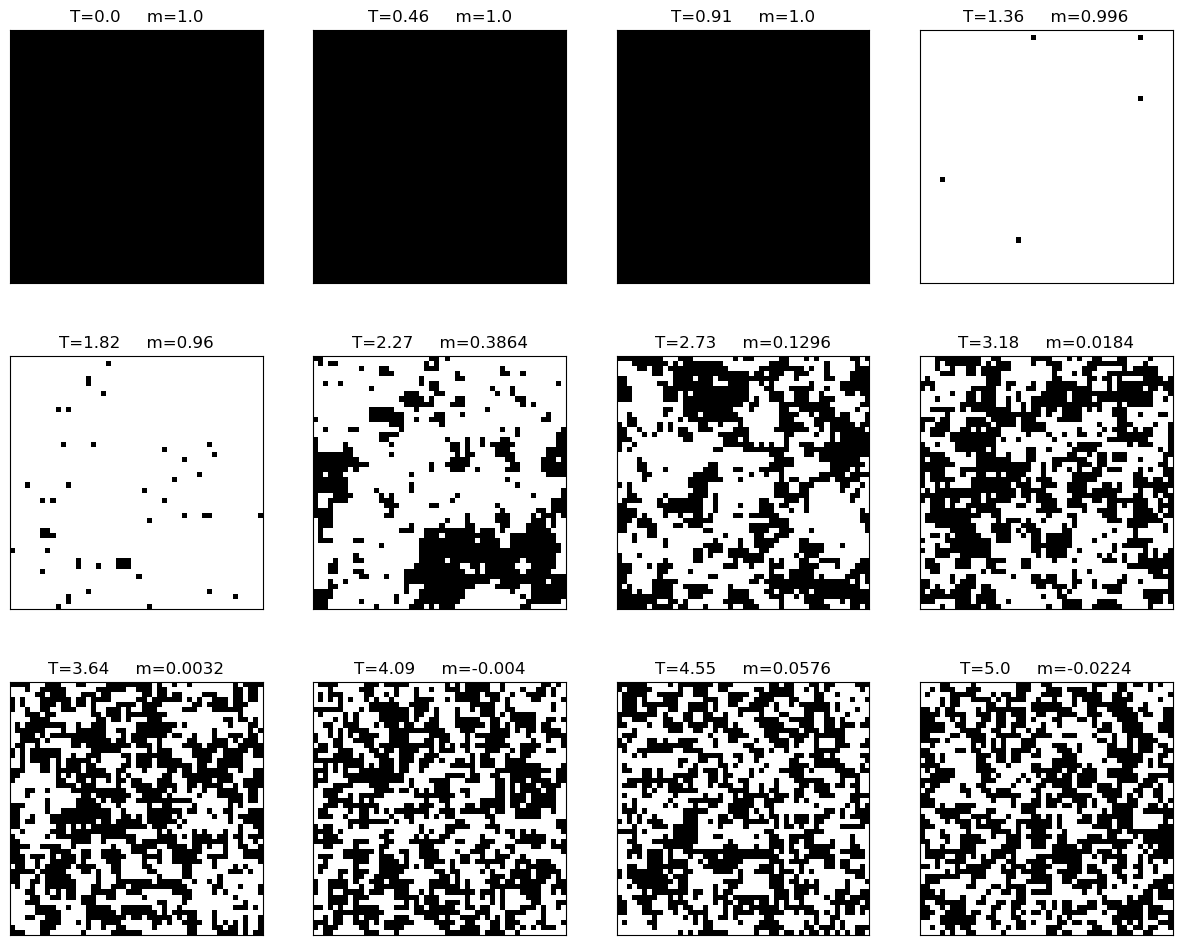

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def solve_Ising(T,N,J=1,B=0): 
    # Initialization
    S = np.ones((N,N),dtype=int)
    # MC loop
    for i in range(1000*N**2):
        pos_x = np.random.randint(0,N)
        pos_y = np.random.randint(0,N)
        dE = get_dE(N,S,pos_x,pos_y,J,B)
        if dE<0:
            S[pos_x,pos_y] = -S[pos_x,pos_y]
        elif np.random.rand()<np.exp(-dE/T):
            S[pos_x,pos_y] = -S[pos_x,pos_y]
    m = np.sum(S)/(N**2)
    return m,S

def get_dE(N,S,pos_x,pos_y,J,B):
    dE = 2*B*S[pos_x,pos_y]
    for i,j in get_neighbor(N,pos_x,pos_y):
        dE = dE + 2*J*S[pos_x,pos_y]*S[i,j]
    return dE

def get_neighbor(N,pos_x,pos_y):
    return [((pos_x+1)%N,pos_y),(pos_x-1,pos_y),(pos_x,(pos_y+1)%N),(pos_x,pos_y-1)]

T = np.linspace(0.001,5,12) # Temperature
N = 50
m_avg = []

fig, axs = plt.subplots(3,4,figsize=(15, 12),subplot_kw={'xticks':[],'yticks':[]})
for i in range(0,3):
    for j in range(0,4):
        m,S = solve_Ising(T[i*4+j],N)
        axs[i,j].imshow(S,cmap='gray')
        axs[i,j].set_title('T='+str(round(T[i*4+j],2))+'     m='+str(round(m,4)))
        m_avg.append(abs(m))
        
plt.show()